### 1. 라이브러리 설치

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import font_manager, rc
import statsmodels.api as sm
from scipy.stats import zscore

In [3]:
data = pd.read_csv("./bloodsugar.csv")

### 3. 표본추출

In [22]:
# 원데이터 
rawData = pd.read_csv("./bloodsugar.csv")

In [23]:
# sample 메서드에서 random_state로 시드 설정
sampledDf = rawData.sample(frac=0.7, random_state=seed_value)
sampledDf = sampledDf.drop(columns = ["Unnamed: 0"])
sampledDf = pd.DataFrame(sampledDf)

In [24]:
sampledDf.head(3)

,id,memb_id,get_time,device_id,bls_value,tag1,tag2,tag3,device_serial,create_dttm
333,348,52a62c11-7c4f-4912-91c9-ff5c145328cd,2023-07-16 21:35:30,d7acb805-d4c7-4bb0-bea7-cf9db83efe81,127,0,0,NaN,18:54:CF:66:96:7C,2023-10-18 04:34:39.604054
137,149,52a62c11-7c4f-4912-91c9-ff5c145328cd,2023-08-17 01:30:02,d7acb805-d4c7-4bb0-bea7-cf9db83efe81,127,4,0,NaN,AC:4D:16:41:99:0C,2023-10-18 04:34:39.446448
72,84,52a62c11-7c4f-4912-91c9-ff5c145328cd,2023-07-23 21:16:51,d7acb805-d4c7-4bb0-bea7-cf9db83efe81,131,0,0,NaN,18:54:CF:66:96:7C,2023-10-18 04:34:39.446448


In [29]:
sampledDf.dtypes

id                        int64
memb_id                  object
get_time         datetime64[ns]
device_id                object
bls_value                 int64
tag1                      int64
tag2                      int64
tag3                     object
device_serial            object
create_dttm              object
dtype: object

In [84]:
sampledDf['get_time'] = pd.to_datetime(sampledDf['get_time'])

In [87]:
# data = sampledDf.loc[sampledDf.tag1 == 2]
grouped_data = sampledDf.groupby(sampledDf['get_time'].dt.to_period('H'))[['bls_value', 'tag1']].mean()

In [ ]:
# 식사전 혈당 평균

blsBF = sampledDf.loc[sampledDf.tag1 == 1].bls_value.mean()

blsBF

# 식사후 혈당 평균

In [164]:
# 한글 폰트 설정 (예시로 나눔고딕을 사용합니다. 사용하려는 폰트로 변경 가능)
font_path = "C:/Windows/Fonts/Gulim.ttc"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

[126.9090909090909]
[126.9090909090909, 129.76]
[126.9090909090909, 129.76, 117.3]
[126.9090909090909, 129.76, 117.3, 134.8048780487805]
[126.9090909090909, 129.76, 117.3, 134.8048780487805, 127.52941176470588]
[126.9090909090909, 129.76, 117.3, 134.8048780487805, 127.52941176470588, 115.07407407407408]
[126.9090909090909, 129.76, 117.3, 134.8048780487805, 127.52941176470588, 115.07407407407408, 141.83333333333334]
[126.9090909090909, 129.76, 117.3, 134.8048780487805, 127.52941176470588, 115.07407407407408, 141.83333333333334, 124.25]
[126.9090909090909, 129.76, 117.3, 134.8048780487805, 127.52941176470588, 115.07407407407408, 141.83333333333334, 124.25, 117.4]
[126.9090909090909, 129.76, 117.3, 134.8048780487805, 127.52941176470588, 115.07407407407408, 141.83333333333334, 124.25, 117.4, 104.5]


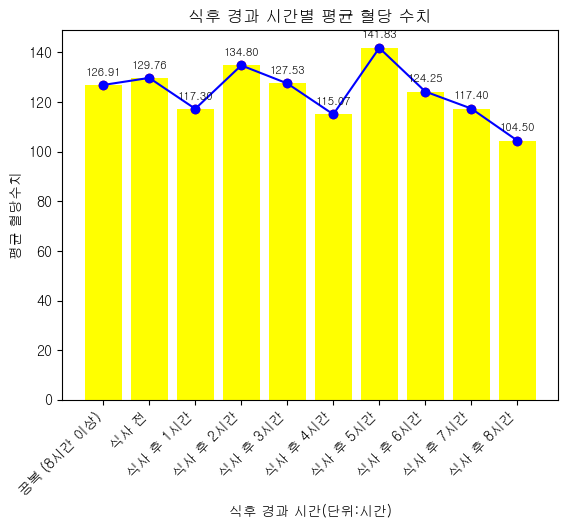

In [188]:
# Assuming 'sampledDf' is your DataFrame
tag1_values = sampledDf['tag1'].unique()

# Map tag1 values to their corresponding labels
tag1_labels = {
    0: '공복 (8시간 이상)',
    1: '식사 전',
    2: '식사 후 1시간',
    3: '식사 후 2시간',
    4: '식사 후 3시간',
    5: '식사 후 4시간',
    6: '식사 후 5시간',
    7: '식사 후 6시간',
    8: '식사 후 7시간',
    9: '식사 후 8시간',
    10: '식사 후 9시간',
    11: '식사 후 10시간',
    12: '식사 후 11시간',
    13: '식사 후 12시간'
}

def blsAF(tag1_labels, sampledDf):
    result_list = []
    
    for tag1_labels in tag1_values:
        mean_value = sampledDf.loc[sampledDf['tag1'] == tag1_labels, 'bls_value']
        mean_value = mean_value.mean()
        result_list.append(mean_value)
        print(result_list)
    
    return result_list

result = blsAF(tag1_values, sampledDf)

# Sort tag1_values and corresponding labels in chronological order
sorted_values_labels = sorted([(value, tag1_labels[value]) for value in tag1_values])

# Extract sorted values and labels
sorted_values, sorted_labels = zip(*sorted_values_labels)

# Plotting the bar graph
plt.bar(sorted_labels, result, color='yellow')

# Plotting the scatter plot
plt.scatter(sorted_labels, result, color='red')

# Connecting scatter plot points with lines
plt.plot(sorted_labels, result, color='blue', linestyle='-', marker='o')

# Displaying numerical values on each point
for label, value in zip(sorted_labels, result):
    plt.text(label, value + 3, f'{value:.2f}', ha='center', va='bottom', size=8)

plt.xlabel('식후 경과 시간(단위:시간)')
plt.ylabel('평균 혈당수치')
plt.title('식후 경과 시간별 평균 혈당 수치')

# Rotate x-axis labels by 45 degrees for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()


In [187]:
mean_value = sampledDf.loc[sampledDf['tag1'] == 9, 'bls_value']
mean_value.mean()

141.83333333333334

In [23]:
blood_sugar_level = sampledDf["bls_value"]

In [24]:
# 혈당진단 함수정의
def blood_sugar_diagnosis(blood_sugar_level):
    diagnoses = []
    for level in blood_sugar_level:
        if level < 70:
            diagnoses.append("저혈당")
        elif 70 <= level <= 99:
            diagnoses.append("정상")
        elif 100 <= level <= 125:
            diagnoses.append("공복혈당장애(IFG)")
        else:
            diagnoses.append("당뇨병")
    return diagnoses

result = blood_sugar_diagnosis(blood_sugar_level)

In [25]:
# 결과 출력
sampledDf['diagnosis'] = result
data = pd.DataFrame(sampledDf)
data.head(5)

,id,memb_id,get_time,device_id,bls_value,tag1,tag2,tag3,device_serial,create_dttm,diagnosis
333,348,52a62c11-7c4f-4912-91c9-ff5c145328cd,2023-07-16 21:35:30,d7acb805-d4c7-4bb0-bea7-cf9db83efe81,127,0,0,NaN,18:54:CF:66:96:7C,2023-10-18 04:34:39.604054,당뇨병
137,149,52a62c11-7c4f-4912-91c9-ff5c145328cd,2023-08-17 01:30:02,d7acb805-d4c7-4bb0-bea7-cf9db83efe81,127,4,0,NaN,AC:4D:16:41:99:0C,2023-10-18 04:34:39.446448,당뇨병
72,84,52a62c11-7c4f-4912-91c9-ff5c145328cd,2023-07-23 21:16:51,d7acb805-d4c7-4bb0-bea7-cf9db83efe81,131,0,0,NaN,18:54:CF:66:96:7C,2023-10-18 04:34:39.446448,당뇨병
364,661,52a62c11-7c4f-4912-91c9-ff5c145328cd,2023-11-07 08:43:28,5c46d4b4-ceaa-43a3-9d79-3e2360eec29c,72,5,0,샤오미,99999,2023-11-07 08:44:27.300518,정상
73,85,52a62c11-7c4f-4912-91c9-ff5c145328cd,2023-07-23 23:08:33,d7acb805-d4c7-4bb0-bea7-cf9db83efe81,100,2,0,"후라이 2개, 미숫갈루. 한잔",AC:4D:16:41:99:0C,2023-10-18 04:34:39.446448,공복혈당장애(IFG)


In [27]:
data['get_time'] = pd.to_datetime(data['get_time'])

In [28]:
# 한글 폰트 설정 (예시로 나눔고딕을 사용합니다. 사용하려는 폰트로 변경 가능)
font_path = "C:/Windows/Fonts/Gulim.ttc"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [29]:
# 주(week) 컬럼 추가
data['week'] = data['get_time'].dt.isocalendar().week
data['week']

333    28
137    33
72     29
364    45
73     29
       ..
178    18
41     38
410    49
206    20
282    25
Name: week, Length: 310, dtype: UInt32

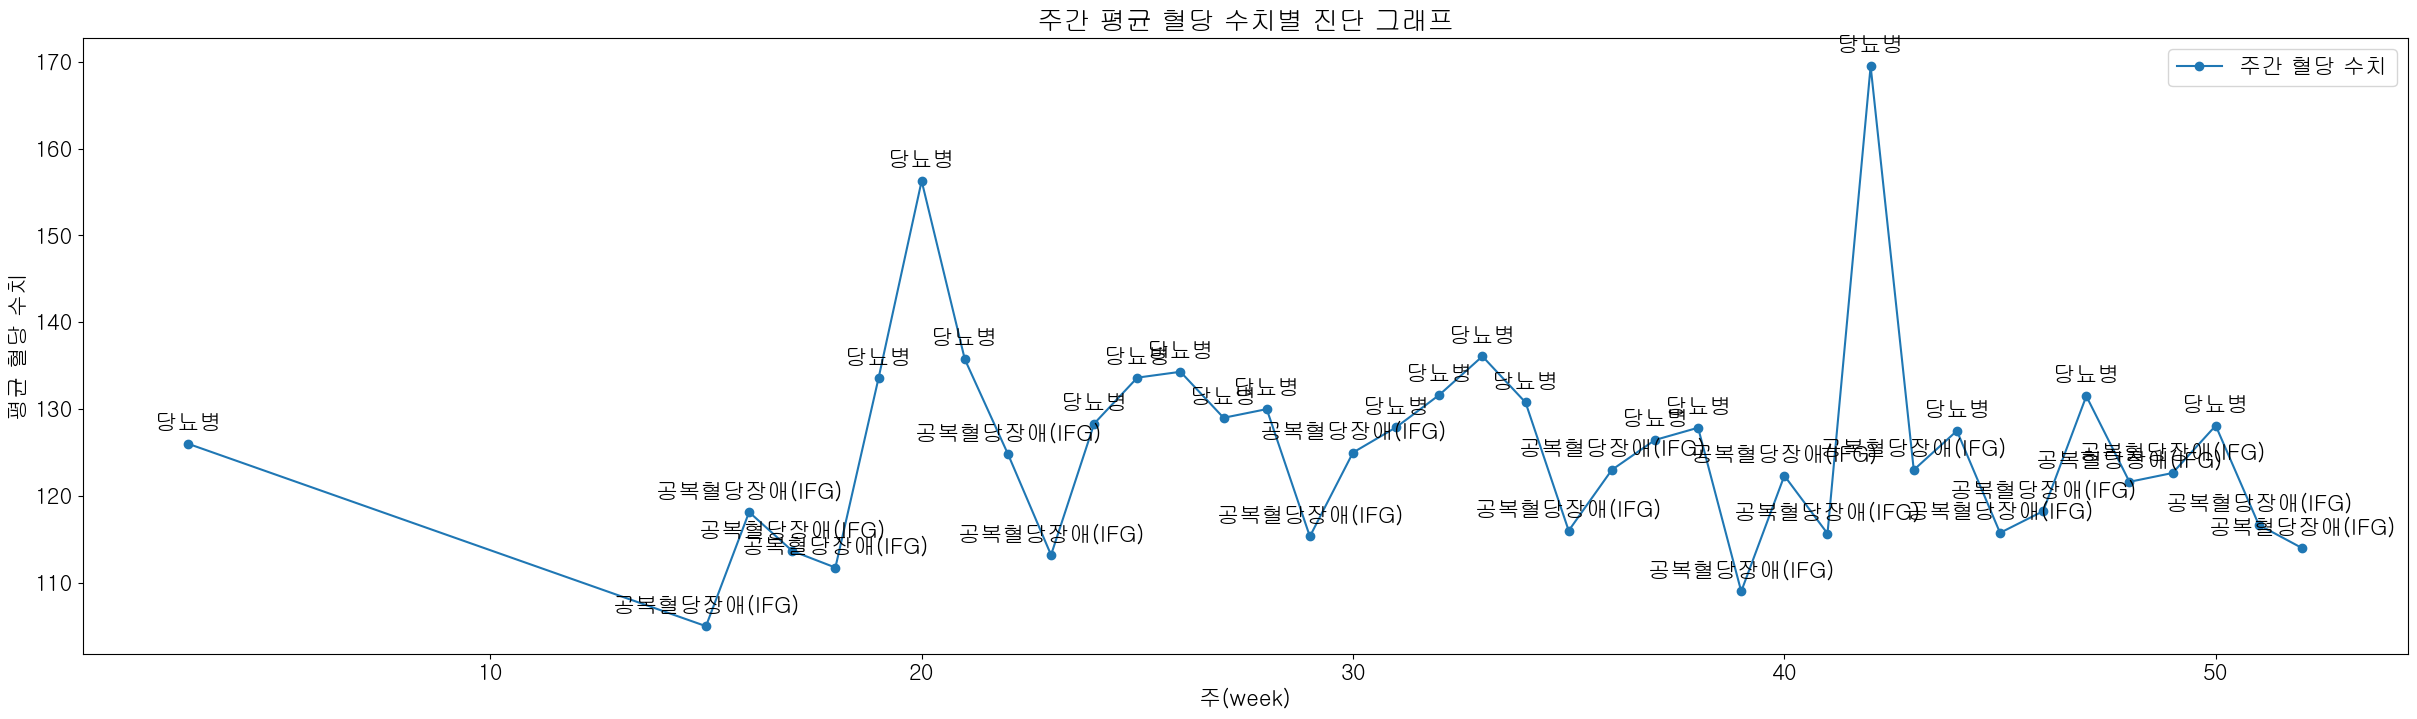

In [75]:
# 혈당 수치 추출
blood_sugar_level = data.groupby('week')['bls_value'].mean()

# 혈당 진단 결과 추가
result = blood_sugar_diagnosis(blood_sugar_level)
weekly_diagnosis = pd.DataFrame({'week': blood_sugar_level.index, 'diagnosis': result})

# 글꼴 크기 조절
plt.rcParams['font.size'] = 16

# 그래프 그리기
plt.figure(figsize=(30, 8))
plt.plot(weekly_diagnosis['week'], blood_sugar_level, label='주간 혈당 수치', marker='o')
plt.title('주간 평균 혈당 수치별 진단 그래프')
plt.xlabel('주(week)')
plt.ylabel('평균 혈당 수치')
plt.legend()

# 혈당 진단 표시
for i, txt in enumerate(weekly_diagnosis['diagnosis']):
    plt.annotate(txt, (weekly_diagnosis['week'].iloc[i], blood_sugar_level.iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

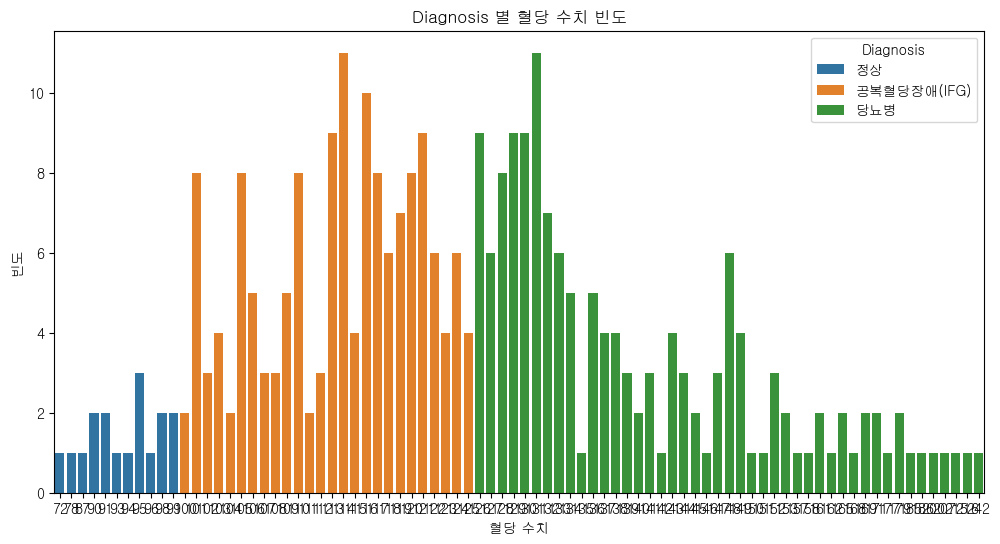

In [68]:
# diagnosis 별 혈당 수치 빈도 체크
blood_sugar_counts = data.groupby(['diagnosis', 'bls_value']).size().reset_index(name='counts')

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x='bls_value', y='counts', hue='diagnosis', data=blood_sugar_counts)
plt.title('Diagnosis 별 혈당 수치 빈도')
plt.xlabel('혈당 수치')
plt.ylabel('빈도')
plt.legend(title='Diagnosis')
plt.show()

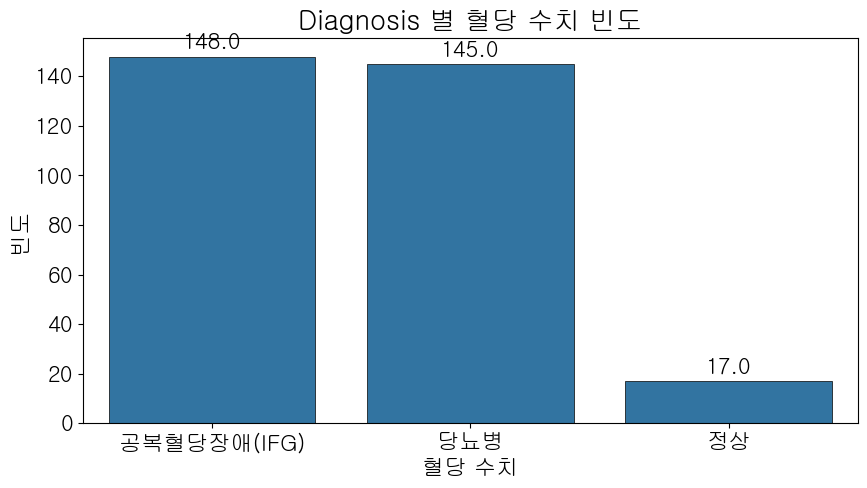

In [76]:
# diagnosis 별 혈당 수치 빈도 체크
blood_sugar_counts = data.groupby(['diagnosis']).size().reset_index(name='counts')

# 그래프 그리기
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='diagnosis', y='counts', data=blood_sugar_counts, linewidth=0.5, edgecolor='black')

# 빈도 숫자 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Diagnosis 별 혈당 수치 빈도')
plt.xlabel('혈당 수치')
plt.ylabel('빈도')
plt.show()

In [6]:
# 시간대별로 혈당증감도

In [7]:
sampledDf.dtypes

id                int64
memb_id          object
get_time         object
device_id        object
bls_value         int64
tag1              int64
tag2              int64
tag3             object
device_serial    object
create_dttm      object
dtype: object

In [8]:
sampledDf['get_time'] = pd.to_datetime(sampledDf['get_time'])

In [9]:
sampledDf = pd.DataFrame(sampledDf)

In [10]:
sampledDf

,id,memb_id,get_time,device_id,bls_value,tag1,tag2,tag3,device_serial,create_dttm
333,348,52a62c11-7c4f-4912-91c9-ff5c145328cd,2023-07-16 21:35:30,d7acb805-d4c7-4bb0-bea7-cf9db83efe81,127,0,0,NaN,18:54:CF:66:96:7C,2023-10-18 04:34:39.604054
137,149,52a62c11-7c4f-4912-91c9-ff5c145328cd,2023-08-17 01:30:02,d7acb805-d4c7-4bb0-bea7-cf9db83efe81,127,4,0,NaN,AC:4D:16:41:99:0C,2023-10-18 04:34:39.446448
72,84,52a62c11-7c4f-4912-91c9-ff5c145328cd,2023-07-23 21:16:51,d7acb805-d4c7-4bb0-bea7-cf9db83efe81,131,0,0,NaN,18:54:CF:66:96:7C,2023-10-18 04:34:39.446448
364,661,52a62c11-7c4f-4912-91c9-ff5c145328cd,2023-11-07 08:43:28,5c46d4b4-ceaa-43a3-9d79-3e2360eec29c,72,5,0,샤오미,99999,2023-11-07 08:44:27.300518
73,85,52a62c11-7c4f-4912-91c9-ff5c145328cd,2023-07-23 23:08:33,d7acb805-d4c7-4bb0-bea7-cf9db83efe81,100,2,0,"후라이 2개, 미숫갈루. 한잔",AC:4D:16:41:99:0C,2023-10-18 04:34:39.446448
...,...,...,...,...,...,...,...,...,...,...
178,190,52a62c11-7c4f-4912-91c9-ff5c145328cd,2023-05-01 00:23:11,d7acb805-d4c7-4bb0-bea7-cf9db83efe81,120,0,0,NaN,NaN,2023-10-18 04:34:39.446448
41,52,52a62c11-7c4f-4912-91c9-ff5c145328cd,2023-09-21 02:01:17,5c46d4b4-ceaa-43a3-9d79-3e2360eec29c,118,5,0,NaN,EC:49:97:03:AB:CF,2023-10-18 04:34:39.446448
410,790,52a62c11-7c4f-4912-91c9-ff5c145328cd,2023-12-07 23:21:40,d7acb805-d4c7-4bb0-bea7-cf9db83efe81,132,2,0,NaN,AC:4D:16:41:99:0C,2023-12-07 23:23:43.182006
206,218,52a62c11-7c4f-4912-91c9-ff5c145328cd,2023-05-15 10:04:47,d7acb805-d4c7-4bb0-bea7-cf9db83efe81,126,0,0,NaN,NaN,2023-10-18 04:34:39.446448


In [19]:
result = sampledDf.groupby('tag1')['bls_value'].mean()

In [20]:
result

tag1
0    126.909091
1    104.500000
2    134.804878
3    127.529412
4    129.760000
5    117.300000
6    115.074074
7    117.400000
8    124.250000
9    141.833333
Name: bls_value, dtype: float64

In [68]:
# 주(week) 컬럼 추가
sampledDf['month'] = sampledDf['get_time'].dt.isocalendar().month
sampledDf['month']
# 혈당 수치 추출
blood_sugar_level_monthly = sampledDf.groupby('month')['bls_value'].mean()

# 혈당 진단 결과 추가
result_monthly = blood_sugar_diagnosis(blood_sugar_level_monthly)
monthly_diagnosis = pd.DataFrame({'month': blood_sugar_level_monthly.index, 'diagnosis': result_monthly})

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(monthly_diagnosis['month'], blood_sugar_level_monthly, label='월간 혈당 수치', marker='o')
plt.title('월간 혈당 수치')
plt.xlabel('월(month)')
plt.ylabel('평균 혈당 수치')
plt.legend()

# 혈당 진단 표시
for i, txt in enumerate(monthly_diagnosis['diagnosis']):
    plt.annotate(txt, (monthly_diagnosis['month'].iloc[i], blood_sugar_level_monthly.iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


AttributeError: 'DataFrame' object has no attribute 'month'

In [55]:
# 기술통계 계산
mean_value = np.mean(sampledDf["bls_value"])
median_value = np.median(sampledDf["bls_value"])
std_deviation = np.std(sampledDf["bls_value"], ddof=1)

In [56]:
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_deviation)

Mean: 125.90322580645162
Median: 123.5
Standard Deviation: 21.652678838595417


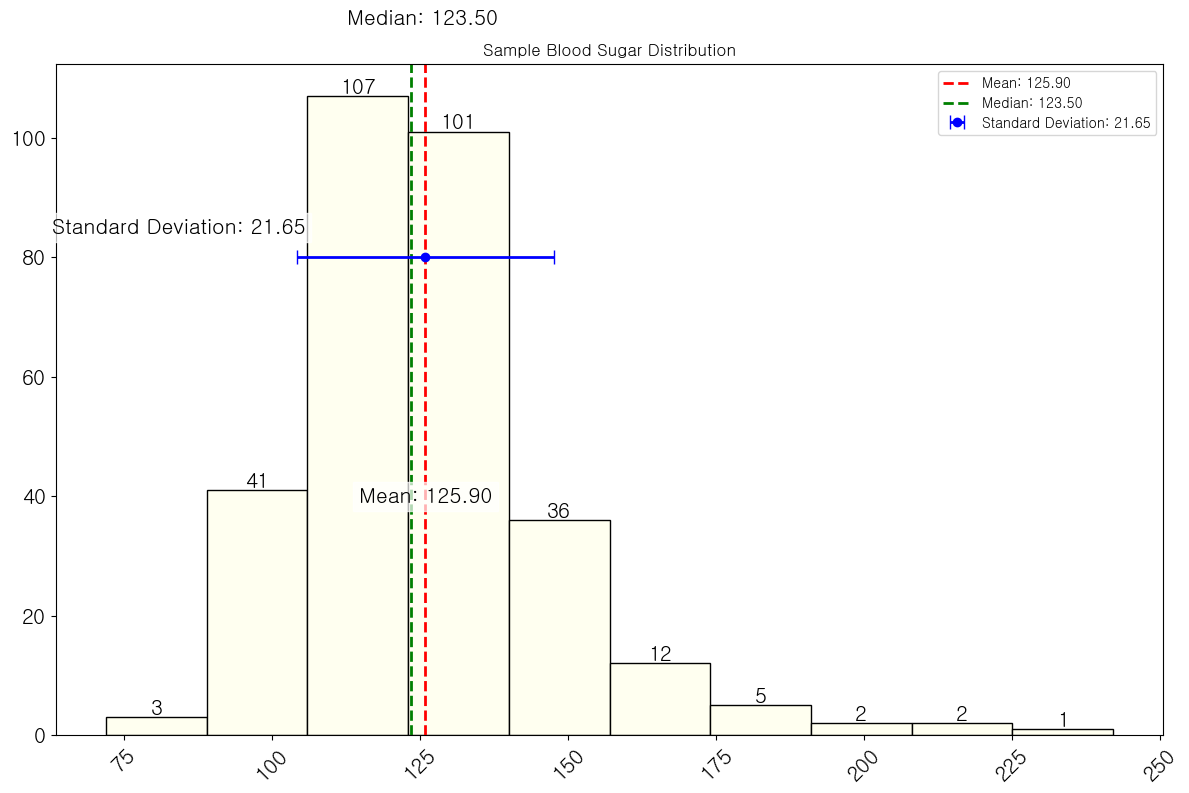

In [57]:
plt.figure(figsize=(12, 8))

hist, bins, _ = plt.hist(sampledDf["bls_value"], bins=10, color='ivory', edgecolor='black', alpha=1)
plt.title('Sample Blood Sugar Distribution')

# 평균과 중앙값 표시
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

# 오차막대 표시
plt.errorbar(mean_value, 80, xerr=std_deviation, fmt='o', color='blue', elinewidth=2, capsize=5,
             label=f'Standard Deviation: {std_deviation:.2f}')

# 평균과 중앙값 텍스트 표시
plt.text(mean_value, 40, f'Mean: {mean_value:.2f}', color='black', fontsize=15,
         ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7, edgecolor='white'), rotation=0)
plt.text(median_value + 2, 120, f'Median: {median_value:.2f}', color='black', fontsize=15,
         ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7, edgecolor='white'), rotation=0)

plt.text(mean_value - std_deviation - 20, 85, f'Standard Deviation: {std_deviation:.2f}', color='black', fontsize=15,
         ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7, edgecolor='white'), rotation=0)

plt.legend()

# x축과 y축에 정확한 숫자 명시
plt.xticks(rotation=45, fontsize=15)
plt.yticks(np.arange(0, max(hist) + 1, 20), fontsize=15)  # 히스토그램의 최대 높이를 기준으로 설정

# 각 막대에 빈도수 표시
for i in range(len(hist)):
    plt.text(bins[i] + (bins[i + 1] - bins[i]) / 2, hist[i], str(int(hist[i])), 
             ha='center', va='bottom', fontsize=15)

plt.tight_layout()
plt.show()

In [6]:
sampledDf.dtypes

id                int64
memb_id          object
get_time         object
device_id        object
bls_value         int64
tag1              int64
tag2              int64
tag3             object
device_serial    object
create_dttm      object
dtype: object

In [7]:
# 시간에 따른 평균 및 중앙값 계산

# 'get_time' 열을 datetime으로 변환 (이미 datetime으로 변환한 경우 생략 가능)
sampledDf['get_time'] = pd.to_datetime(sampledDf['get_time'])

In [8]:
# 일별 혈당 평균 및 중앙값 계산
result = sampledDf.groupby(sampledDf['get_time'].dt.date)['bls_value'].agg(['mean', 'median'])

In [10]:
result.head(2)

,mean,median
get_time,,
2023-01-19,126.0,126.0
2023-04-11,105.0,105.0


In [12]:
# 계절성 분해
result = seasonal_decompose(sampledDf['bls_value'], model='additive', period=30)  # 주기를 조절하여 계절성 분해
trend = result.trend
seasonal = result.seasonal

In [31]:
# 한글 폰트 설정 (예시로 나눔고딕을 사용합니다. 사용하려는 폰트로 변경 가능)
font_path = "C:/Windows/Fonts/Gulim.ttc"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [37]:
# 데이터 불러오기 (가정)
data = pd.read_csv("./bloodsugar.csv")

# 'get_time'을 datetime 형식으로 변환
data['get_time'] = pd.to_datetime(data['get_time'])

# 'get_time'을 인덱스로 설정
data.set_index('get_time', inplace=True)

# 'bls_value'를 기준으로 시계열 분해
result = seasonal_decompose(data['bls_value'], model='additive', period=1)

In [38]:
# 시계열 분해 결과에서 trend, seasonal, residual 데이터 가져오기
trend = result.trend
seasonal = result.seasonal
residual = result.resid

In [40]:
seasonal

get_time
2023-08-30 21:53:18    0.0
2023-08-31 06:15:02    0.0
2023-08-31 23:09:23    0.0
2023-09-01 03:18:52    0.0
2023-09-01 03:18:42    0.0
                      ... 
2023-12-20 23:47:11    0.0
2023-12-20 23:48:12    0.0
2023-12-27 08:05:00    0.0
2023-12-27 08:04:48    0.0
2023-12-27 08:06:16    0.0
Name: seasonal, Length: 443, dtype: float64

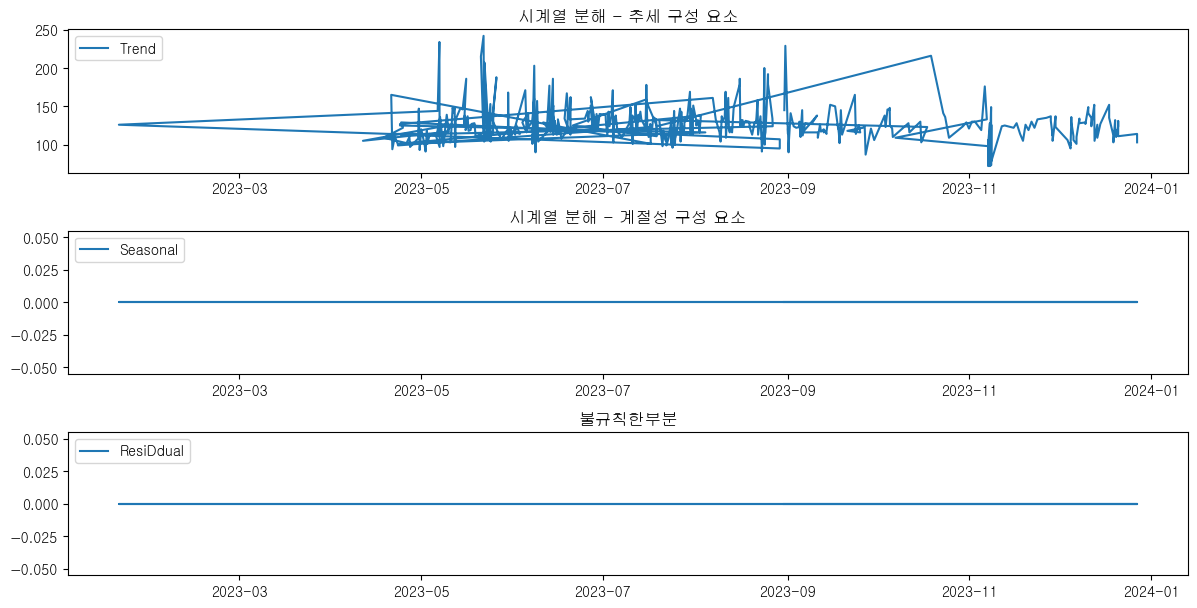

In [51]:
# 시계열 그래프 및 분해 결과 그래프 그리기
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.title('시계열 분해 - 추세 구성 요소')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('시계열 분해 - 계절성 구성 요소')

plt.subplot(4, 1, 4)
plt.plot(residual, label='ResiDdual')
plt.legend(loc='upper left')
plt.title('불규칙한부분')

plt.tight_layout()
plt.show()

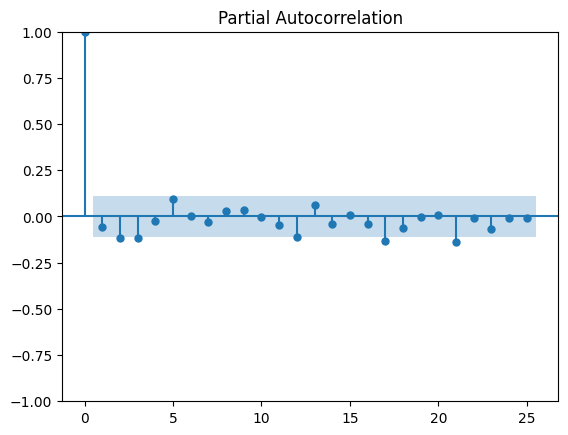

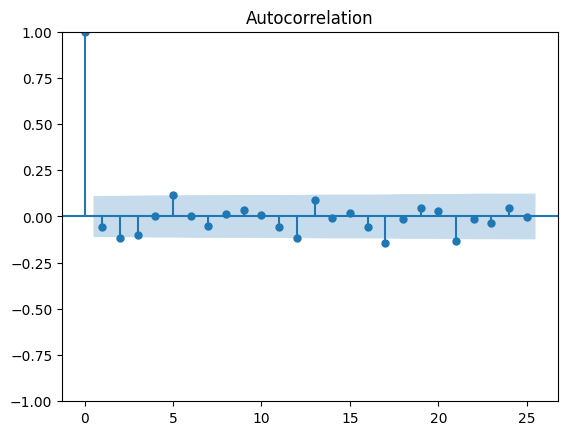

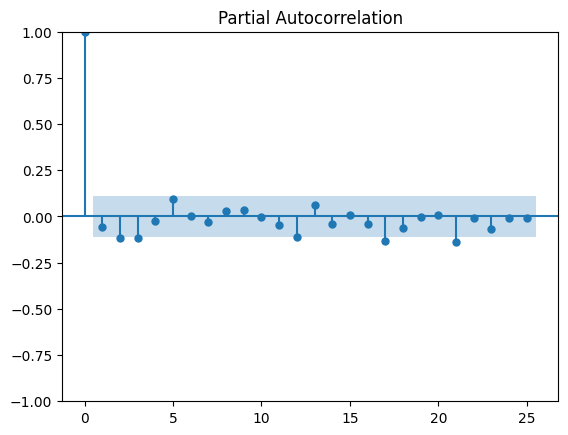

In [18]:
plot_acf(sampledDf['bls_value'])
plot_pacf(sampledDf['bls_value'])

### 3. 기술통계

In [20]:
sample.describe()

,id,get_time,bls_value,tag1,tag2
count,100.000000,100,100.000000,100.000000,100.0
mean,309.360000,2023-08-02 20:40:56.639999744,128.710000,2.120000,0.0
min,12.000000,2023-04-11 11:04:55,78.000000,0.000000,0.0
25%,148.750000,2023-06-05 16:29:40.750000128,115.750000,0.000000,0.0
50%,250.500000,2023-07-23 22:11:49.500000,125.500000,1.500000,0.0
75%,342.500000,2023-09-02 05:32:17.750000128,137.250000,4.000000,0.0
max,837.000000,2023-12-20 23:48:12,229.000000,9.000000,0.0
std,239.576964,NaN,23.772191,2.507685,0.0


In [21]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

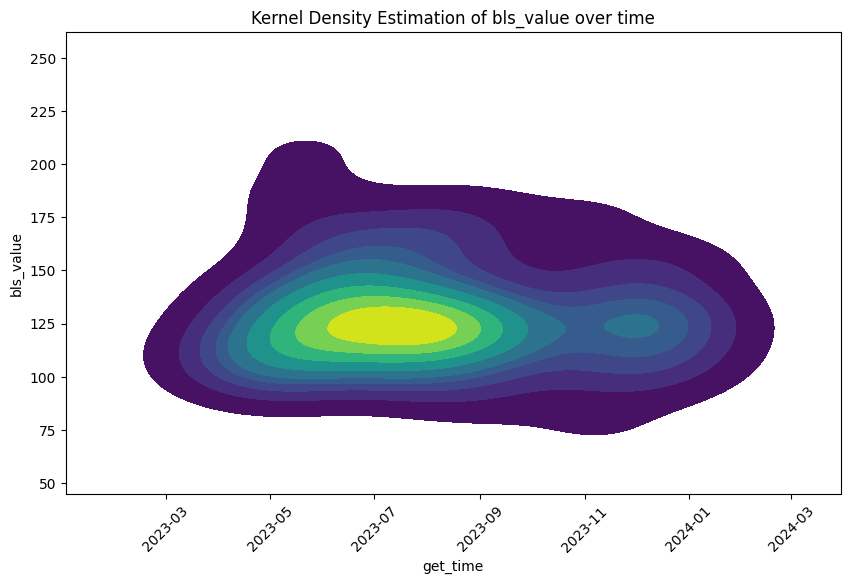

In [27]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=sample, x='get_time', y='bls_value', cmap='viridis', fill=True)
plt.title('Kernel Density Estimation of bls_value over time')
plt.xlabel('get_time')
plt.ylabel('bls_value')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

In [38]:
sample.dtypes

id                int64
memb_id          object
get_time         object
device_id        object
bls_value         int64
tag1              int64
tag2              int64
tag3             object
device_serial    object
create_dttm      object
dtype: object

### 4. 추론통계

In [31]:
# 가상의 혈당 데이터 생성
np.random.seed(42)  # 시드 설정을 통해 재현성 확보
data1 = pd.DataFrame({
    'morning': np.random.normal(loc=120, scale=10, size=50),  # 아침 혈당
    'evening': np.random.normal(loc=130, scale=15, size=50)   # 저녁 혈당
})

In [35]:
data.head()

,morning,evening
0,124.967142,134.861260
1,118.617357,124.223766
2,126.476885,119.846170
3,135.230299,139.175144
4,117.658466,145.464993


In [32]:
# 독립표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(data['morning'], data['evening'])
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# 결과 해석
alpha = 0.05
if p_value < alpha:
    print("두 그룹 간의 혈당 수준에는 통계적으로 유의한 차이가 있습니다.")
else:
    print("두 그룹 간의 혈당 수준에는 통계적으로 유의한 차이가 없습니다.")


T-Statistic: -5.4997664919141105, P-Value: 3.0303503261375475e-07
두 그룹 간의 혈당 수준에는 통계적으로 유의한 차이가 있습니다.


In [33]:
# 상관 분석 수행
correlation = data['morning'].corr(data['evening'])
print(f"상관 계수: {correlation}")

# 결과 해석
if abs(correlation) >= 0.7:
    print("아침과 저녁 혈당 간에 강한 양의 선형 관계가 있습니다.")
elif 0.5 <= abs(correlation) < 0.7:
    print("아침과 저녁 혈당 간에 중간 정도의 양의 선형 관계가 있습니다.")
else:
    print("아침과 저녁 혈당 간에는 선형 관계가 적거나 없습니다.")


상관 계수: 0.1100717853401607
아침과 저녁 혈당 간에는 선형 관계가 적거나 없습니다.
